# Práctica 1

### Ejercicio 2

In [1]:
from PIL import Image
import numpy as np
from skimage.filters import threshold_otsu

C:\Users\Jose Giner\Anaconda3\lib\site-packages\dask\config.py:131: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
im = Image.open("monedas.png")
im.mode

'RGBA'

L


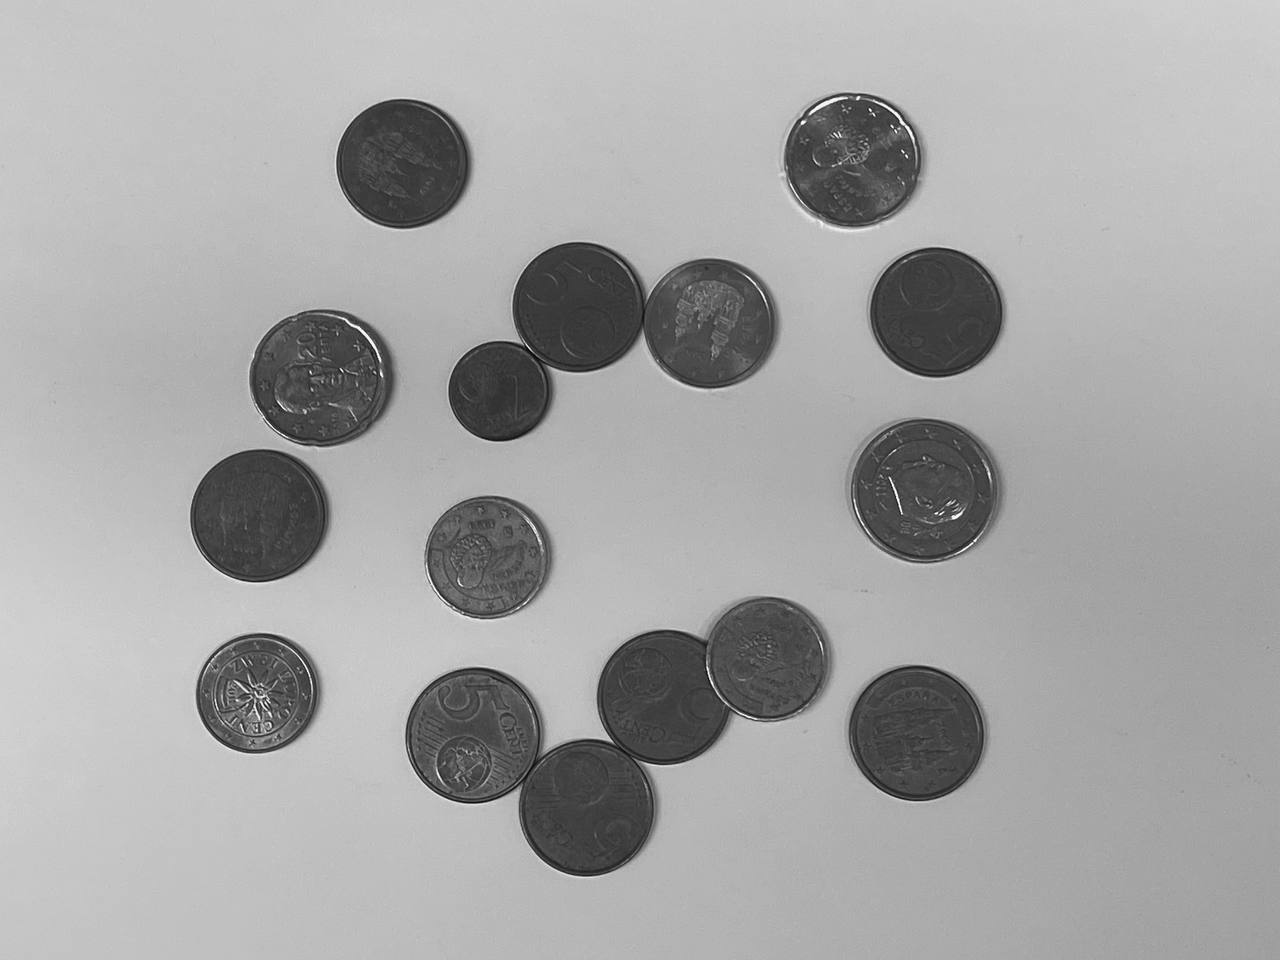

In [3]:
im = im.convert('L')
print(im.mode)
I = np.array(im)
im

In [4]:
np.histogram(I, bins = 256, range = (0,255))[0]

array([    0,     0,     0,     0,     4,     2,     2,     4,     4,
           0,     2,     4,     5,     5,     9,     8,    14,     9,
          18,    15,    20,    28,    30,    30,    38,    39,    43,
          53,    74,    86,    88,   117,   105,   135,   147,   152,
         233,   231,   248,   301,   321,   331,   402,   454,   450,
         468,   610,   617,   711,   802,   953,  1204,  1473,  1621,
        2013,  2571,  3266,  4329,  5135,  5755,  6098,  7111,  7485,
        7441,  7685,  7702,  7493,  7463,  7251,  6938,  6581,  6436,
        6061,  5769,  5304,  5016,  4631,  4393,  3842,  3609,  3380,
        3056,  2918,  2571,  2366,  2372,  2266,  2069,  1858,  1821,
        1717,  1659,  1482,  1528,  1396,  1348,  1316,  1270,  1184,
        1109,  1106,  1011,  1048,   930,   924,   860,   803,   834,
         741,   694,   641,   642,   635,   591,   546,   526,   474,
         481,   453,   438,   466,   432,   418,   378,   387,   381,
         323,   358,

In [6]:
def Otsu(I): 
    th = threshold_otsu(I)
    mask = np.zeros(I.shape)
    mask[I<=th] = 255
    mask = 255 - mask
        
    return mask

In [15]:
def union_find(lis):
    #Función que encuentra la unión de varios conjuntos que comparten elementos entre sí. 
    #Necesaria para la resolución de equivalencias en componentes conexas.
    lis = map(set, lis)
    unions = []
    for item in lis:
        temp = []
        for s in unions:
            if not s.isdisjoint(item):
                item = s.union(item)
            else:
                temp.append(s)
        temp.append(item)
        unions = temp
    return unions

In [16]:
def Label(I, bounding_box = False):
    
    #A continuación aplicamos componentes conexas. Empezamos con la primera pasada
    comp_mat = np.zeros(I.shape)
    equivalencias = []
    componentes = 0

    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i,j] == 0:
                pass
            
            elif i == 0 and j == 0:
                componentes += 1
                comp_mat[i,j] = componentes
            
            elif i == 0:
                if I[i,j] == I[i,j-1]:
                    comp_mat[i,j] = comp_mat[i,j-1]
                
                else:  #Creamos componente
                    componentes += 1
                    comp_mat[i,j] = componentes
            
            elif j == 0:
                if I[i,j] == I[i-1,j+1]:
                    comp_mat[i,j] = comp_mat[i-1,j+1]
                
                elif I[i,j] == I[i-1,j]:
                    comp_mat[i,j] = comp_mat[i-1,j]
                
                else:  #Creamos componente
                    componentes += 1
                    comp_mat[i,j] = componentes
        
            elif j == I.shape[1] - 1:
                if I[i,j] == I[i-1,j]:
                    comp_mat[i,j] = comp_mat[i-1,j]
                    
                elif I[i,j] == I[i-1,j-1]:
                    comp_mat[i,j] = comp_mat[i-1,j-1] 
                
                elif I[i,j] == I[i,j-1]:
                    comp_mat[i,j] = comp_mat[i,j-1]
                
                else:  #Creamos componente
                    componentes += 1
                    comp_mat[i,j] = componentes
                
                    
            else:
                comp_vecinos = [comp_mat[i-1,j+1], comp_mat[i-1,j], comp_mat[i-1,j-1] ,comp_mat[i,j-1]]
                if I[i,j] == I[i-1,j+1]:
                    comp_mat[i,j] = comp_mat[i-1,j+1]
                    
                elif I[i,j] == I[i-1,j]:
                    comp_mat[i,j] = comp_mat[i-1,j]
                    
                elif I[i,j] == I[i-1,j-1]:
                    comp_mat[i,j] = comp_mat[i-1,j-1] 
                
                elif I[i,j] == I[i,j-1]:
                    comp_mat[i,j] = comp_mat[i,j-1]
                
                else: #Creamos componente
                    componentes += 1
                    comp_mat[i,j] = componentes
                
                aux = set(cv for cv in comp_vecinos if cv != 0)
                if len(aux) > 1: #colisión de etiquetas encontrada
                    relacion = list(aux)
                    if relacion not in equivalencias:
                        equivalencias.append(relacion)  #Almacenamos la relación en una lista si no estaba antes
        
    
    #Segunda pasada para resolver equivalencias
    
    comp_no_aisladas = set(e for lista in equivalencias for e in lista)
    for comp in range(1,componentes+1):
        if comp not in comp_no_aisladas:
            equivalencias.append([comp])
    
    equivalencias = union_find(equivalencias) #Unimos las equivalencias

    dic_equivalencias = {}
    c = 1
    for clase in equivalencias:
        dic_equivalencias[c] = clase
        c += 1

        
    #Creamos la matriz final de componentes con las equivalencias resueltas  
    final_comp_matrix = np.zeros(comp_mat.shape)
    for i in range(comp_mat.shape[0]):
        for j in range(comp_mat.shape[1]):
            for k in dic_equivalencias.keys():
                if comp_mat[i,j] in dic_equivalencias[k]:
                    final_comp_matrix[i,j] = k
     
    #Dibujamos la caja de mínima inclusión en caso de que el parámetro bounding_box sea True
    if bounding_box:
        final_comp_matrix_bb = final_comp_matrix.copy()
        for comp in dic_equivalencias:
            lista_indices = []
            for i in range(final_comp_matrix.shape[0]):
                for j in range(final_comp_matrix.shape[1]):
                    if final_comp_matrix[i,j] == comp:
                        lista_indices.append((i,j))

            min_x = min(lista_indices, key = lambda t: t[0])[0]
            max_x = max(lista_indices, key = lambda t: t[0])[0]
            min_y = min(lista_indices, key = lambda t: t[1])[1]
            max_y = max(lista_indices, key = lambda t: t[1])[1]

            for x in range(min_x, max_x + 4):
                final_comp_matrix_bb[x-3:x,min_y -3: min_y] = len(dic_equivalencias) + 1
                final_comp_matrix_bb[x-3:x,max_y: max_y + 3] = len(dic_equivalencias) + 1

            for y in range(min_y, max_y + 4):
                final_comp_matrix_bb[min_x -3: min_x , y-3:y] = len(dic_equivalencias) + 1
                final_comp_matrix_bb[max_x :max_x + 3,y-3:y] = len(dic_equivalencias) + 1
                    
        return final_comp_matrix_bb

    return final_comp_matrix

In [10]:
def Erosionado(I, size):
    
    B = np.zeros((size,size))
    res = np.full(I.shape,255)
    
    for i in range(I.shape[0] - size + 1):
        for j in range(I.shape[1] - size + 1):
            if np.array_equal(I[i:i+size, j:j+size], B):
                res[i + size//2,j + size//2] = 0
    
    
    return res


def Dilatado(I,size):
    
    B = np.zeros((size,size))
    res = np.full(I.shape,255)
    
    for i in range(I.shape[0] - size + 1):
        for j in range(I.shape[1] - size + 1):
            if B[0][0] in I[i:i+size, j:j+size]:
                res[i + size//2,j + size//2] = 0
    
    return res


def Cierre(I, size):
    img_dilatada = Dilatado(I, size)
    return Erosionado(img_dilatada, size)


In [7]:
mask = Otsu(I)
np.histogram(mask, bins = 256, range = (0,255))[0]

array([ 216677,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,     

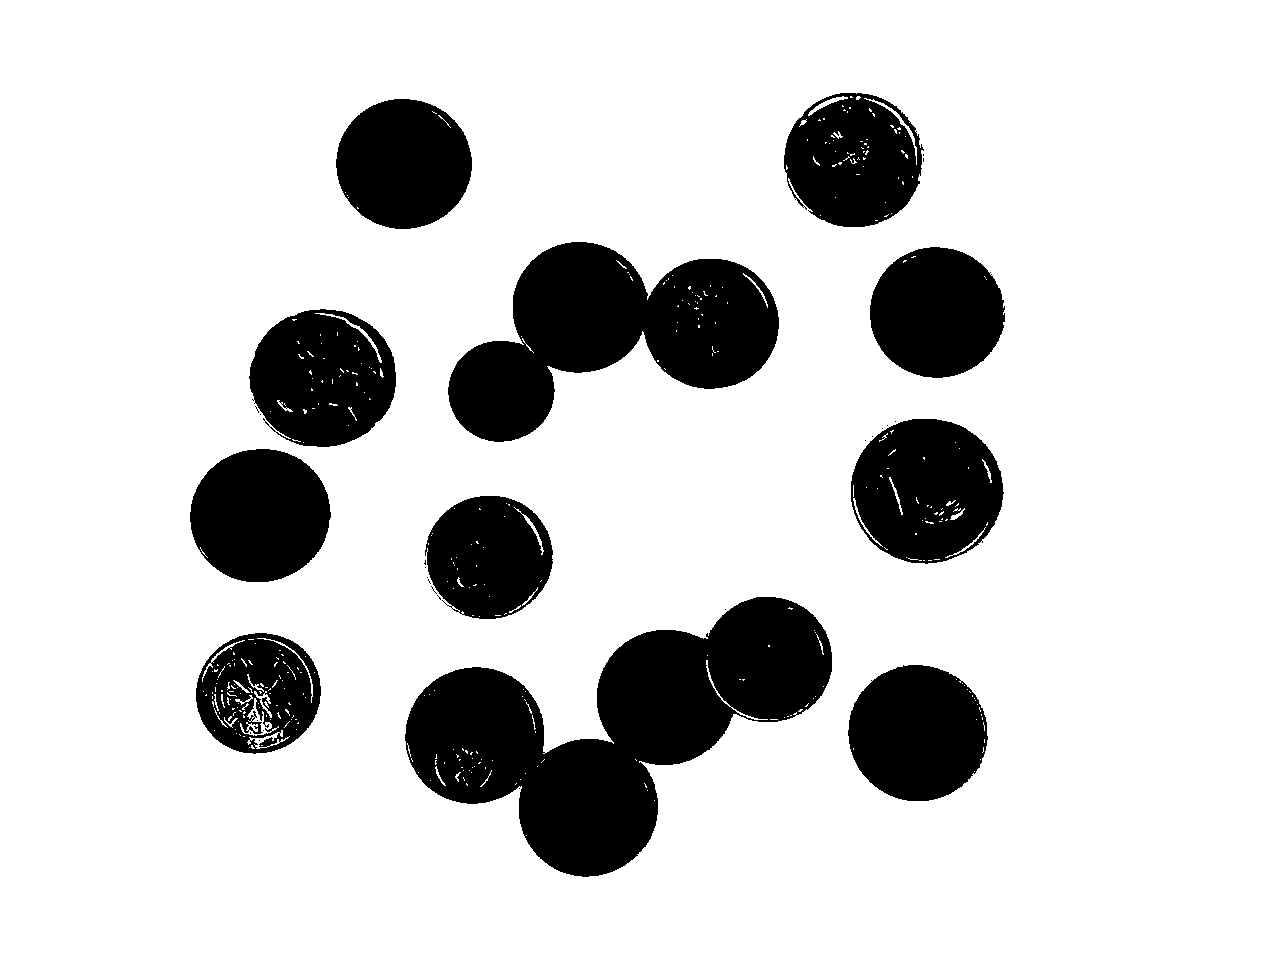

In [8]:
im2 = np.uint8(mask)
im2 = Image.fromarray(im2)
im2

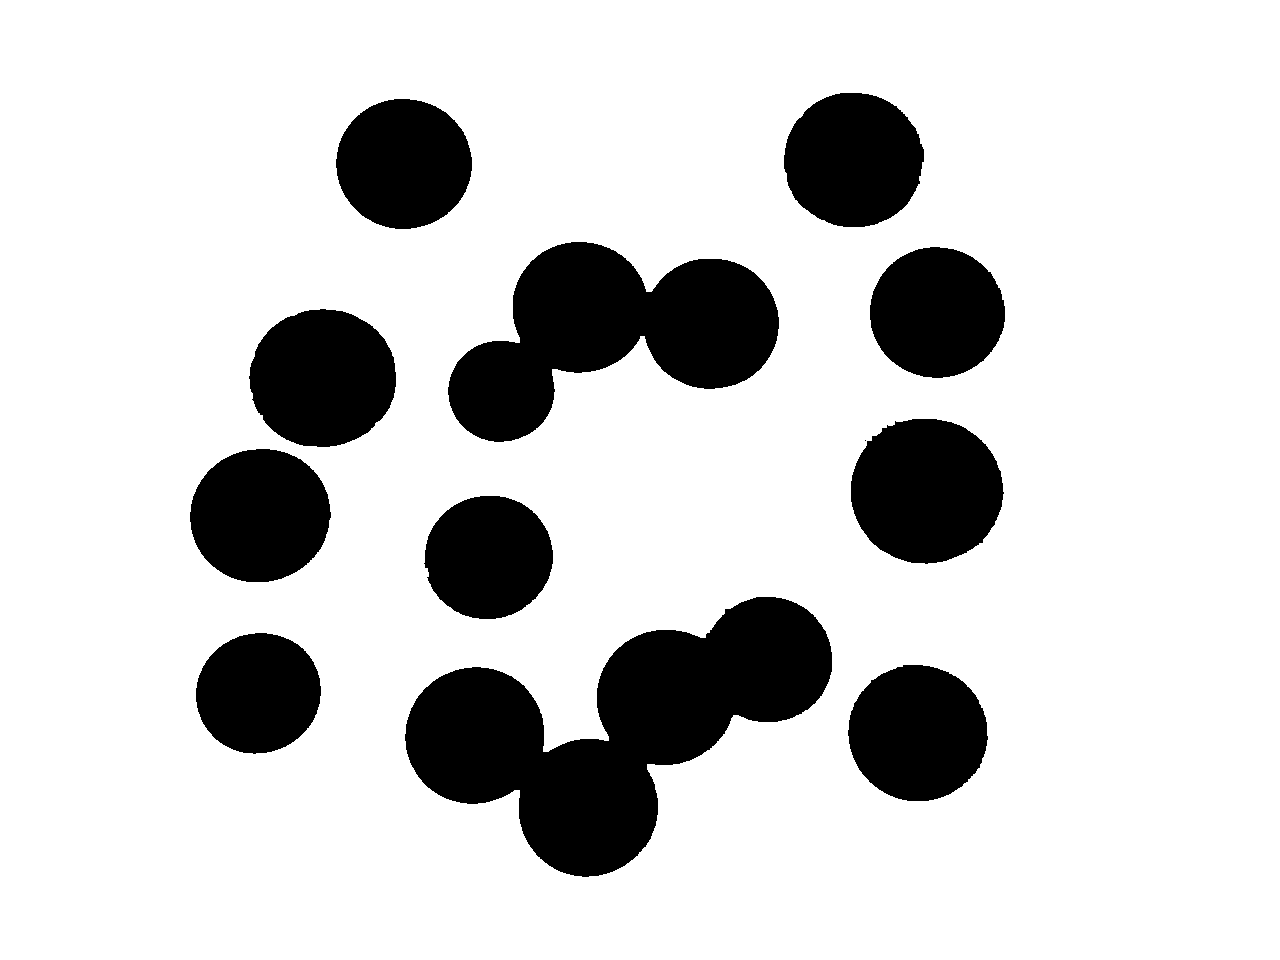

In [11]:
S1 = Cierre(mask,5)
S1 = np.uint8(S1)
im3 = Image.fromarray(S1)
im3

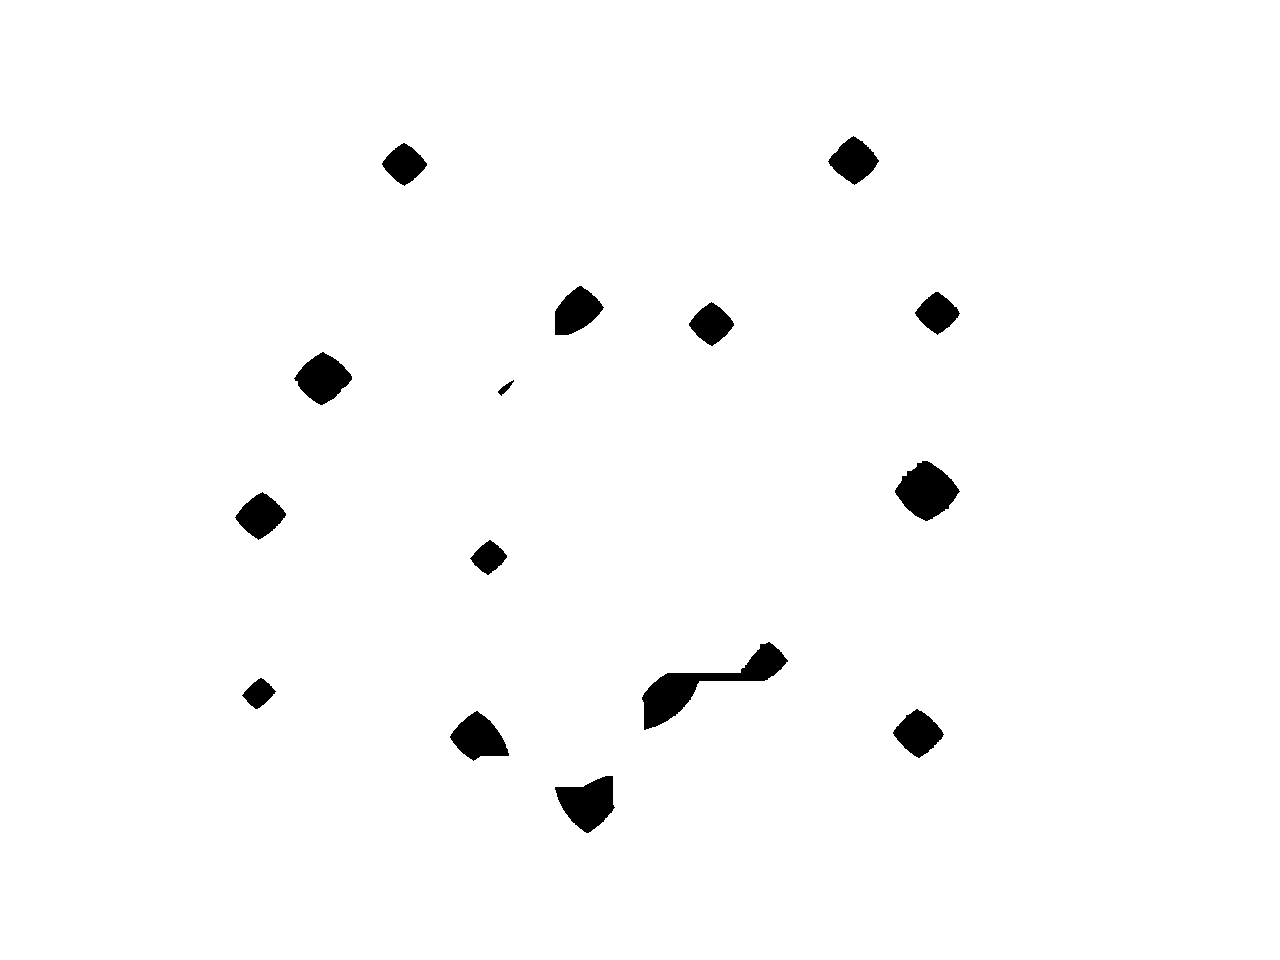

In [13]:
S2 = Erosionado(S1, 70)
im4 = np.uint8(S2)
im4 = Image.fromarray(im4)
im4

In [17]:
def contarMonedas(I):
    #Primero aplicamos Otsu para umbralizar la imagen de entrada
    mask = Otsu(I)
    
    #A continuación realizamos un cierre para rellenar los huecos provocados por imprecisiones en la umbralización.
    S1 = Cierre(mask,5)
    
    #Ahora hacemos un erosionado para desconectar componentes y quedarnos con los píxeles centrales de cada una.
    S2 = Erosionado(S1, 70)
    
    #Sacamos la imagen inversa para que pueda ser tratada por la función que etiqueta a los píxeles según su componente,
    #donde se asume que el fondo son los píxeles con valor de 0.
    S3 = abs(S2 - 255)
    
    #Llamamos a la función de etiquetado de componentes conexas
    comp_mat = Label(S3)
    
    #Contamos las componentes distintas a cero (que no correspondan al fondo)
    componentes = len(np.unique(comp_mat[np.nonzero(comp_mat)])) 
    
    return componentes
    

In [18]:
comp = contarMonedas(I)
print("El número de componentes en la imagen es: "+ str(comp))

El número de componentes en la imagen es: 15
